# Read Files

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_json('data/transactions.txt', lines=True)


(df.head(50))


# EDA Analysis 

## 1. Basic Information Dataset Overview

In [45]:
print(df.head())
print(df.info())

   accountNumber  customerId  creditLimit  availableMoney   
0      737265056   737265056         5000          5000.0  \
1      737265056   737265056         5000          5000.0   
2      737265056   737265056         5000          5000.0   
3      737265056   737265056         5000          5000.0   
4      830329091   830329091         5000          5000.0   

   transactionDateTime  transactionAmount         merchantName acqCountry   
0  2016-08-13T14:27:32              98.55                 Uber         US  \
1  2016-10-11T05:05:54              74.51          AMC #191138         US   
2  2016-11-08T09:18:39               7.47           Play Store         US   
3  2016-12-10T02:14:50               7.47           Play Store         US   
4  2016-03-24T21:04:46              71.18  Tim Hortons #947751         US   

  merchantCountryCode posEntryMode  ... echoBuffer currentBalance   
0                  US           02  ...                       0.0  \
1                  US           

## 2. Descriptive Statistics

In [46]:
print(df.describe())


       accountNumber    customerId    creditLimit  availableMoney   
count   7.863630e+05  7.863630e+05  786363.000000   786363.000000  \
mean    5.372326e+08  5.372326e+08   10759.464459     6250.725369   
std     2.554211e+08  2.554211e+08   11636.174890     8880.783989   
min     1.000881e+08  1.000881e+08     250.000000    -1005.630000   
25%     3.301333e+08  3.301333e+08    5000.000000     1077.420000   
50%     5.074561e+08  5.074561e+08    7500.000000     3184.860000   
75%     7.676200e+08  7.676200e+08   15000.000000     7500.000000   
max     9.993896e+08  9.993896e+08   50000.000000    50000.000000   

       transactionAmount        cardCVV     enteredCVV  cardLast4Digits   
count      786363.000000  786363.000000  786363.000000    786363.000000  \
mean          136.985791     544.467338     544.183857      4757.417799   
std           147.725569     261.524220     261.551254      2996.583810   
min             0.000000     100.000000       0.000000         0.000000   
25%

## 3. Data Cleaning and Preprocessing Missing Values

In [52]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
missing_values

Series([], dtype: int64)


accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [59]:
def count_empty_strings(column):
    return (column == '').sum()

# Apply this function to each column
empty_string_counts = df.apply(count_empty_strings)
print(empty_string_counts)


accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

### 3.1 Drop columns with mostly empty strings(count > 70,000)

In [ ]:
df.drop(['echoBuffer', 'merchantCity', 'merchantZip', 'posOnPremises', 'recurringAuthInd' ,'merchantState'], axis=1, inplace=True)


In [81]:
df.head(50)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
5,830329091,830329091,5000,5000.00,2016-04-19 16:24:27,30.76,In-N-Out #422833,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
6,830329091,830329091,5000,5000.00,2016-05-21 14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
7,830329091,830329091,5000,5000.00,2016-06-03 00:31:21,9.37,Shake Shack #968081,US,US,05,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
8,830329091,830329091,5000,4990.63,2016-06-10 01:21:46,523.67,Burger King #486122,unknown,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,9.37,True,False,False
9,830329091,830329091,5000,5000.00,2016-07-11 10:47:16,164.37,Five Guys #510989,US,US,05,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False


### 3.2 inputing missing values with 'unkown' to stay truthful to our data

In [76]:
columns_to_update = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']

# Replace empty strings with 'unknown' in the specified columns
for column in columns_to_update:
    df[column] = df[column].replace('', 'unknown')

# 4. Data Preprocessing, Data Type Conversion, Cat encoding, missing value imputing

In [68]:
# Convert dates to datetime for plotting
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# 5. Data Visualization 

## 5.1 Numerical & Categorical Features visuals

numerical features
Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'currentBalance'],
      dtype='object')
categorical_features
Index(['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'transactionType',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')


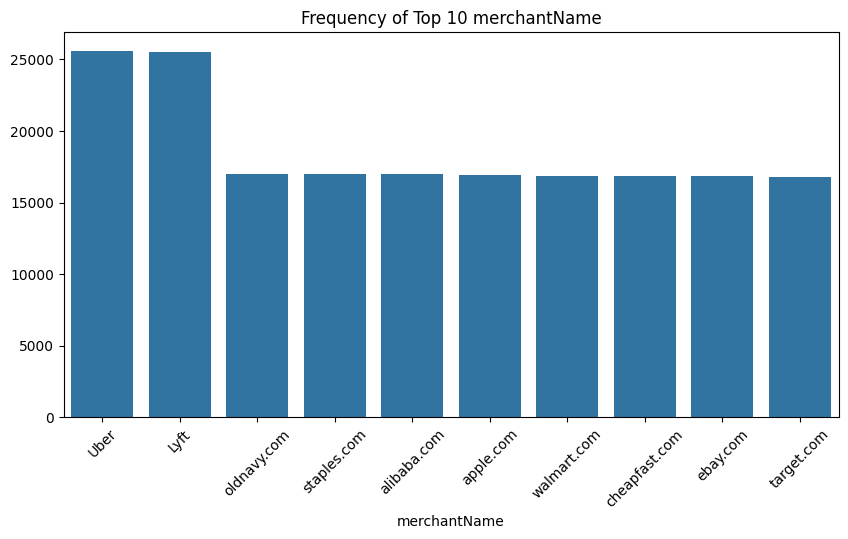

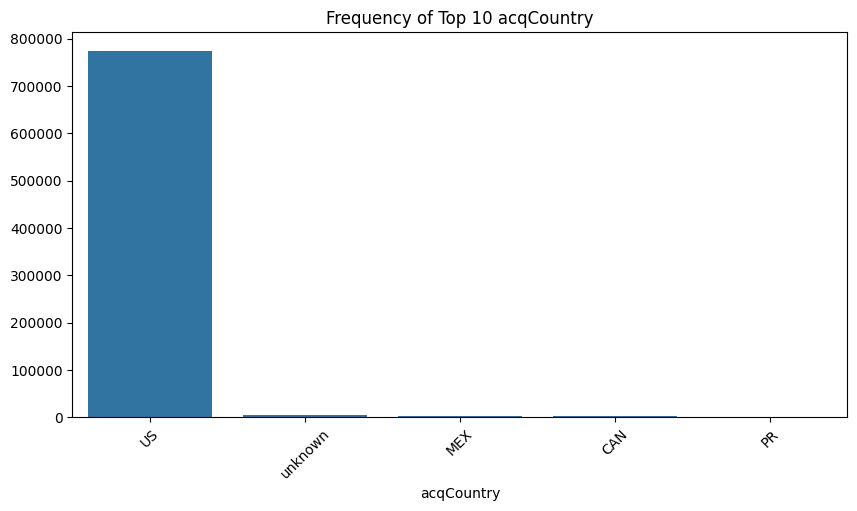

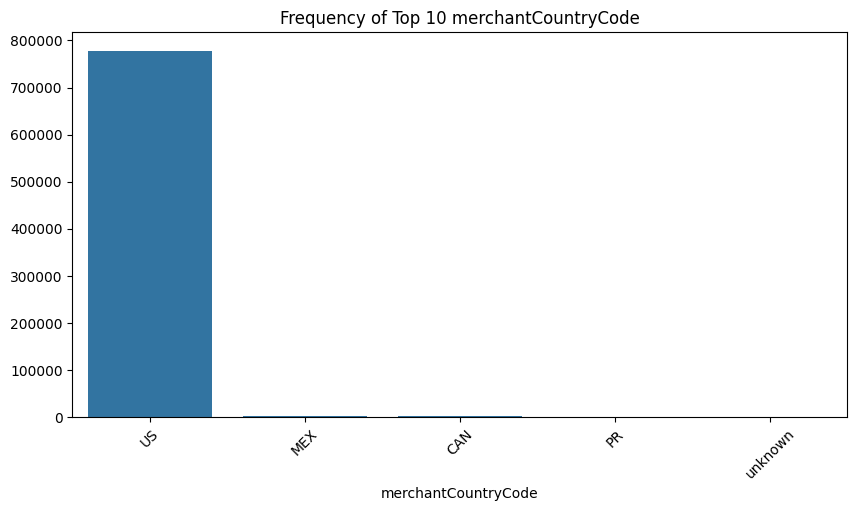

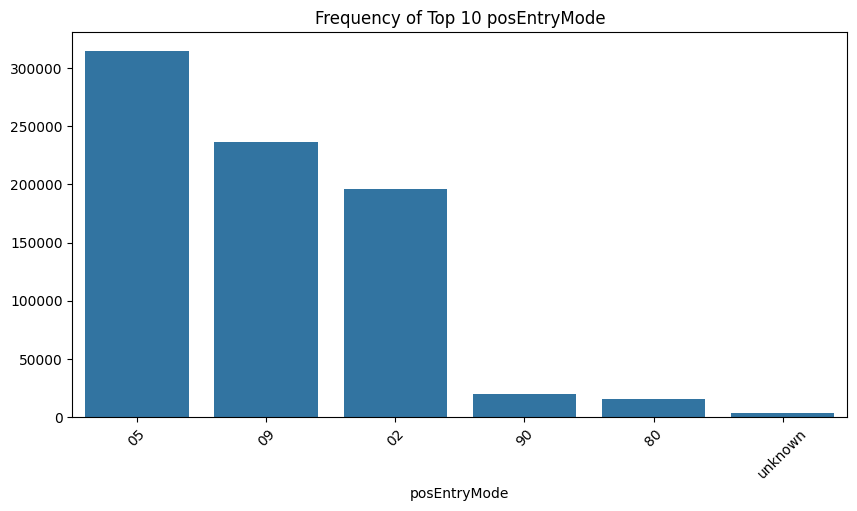

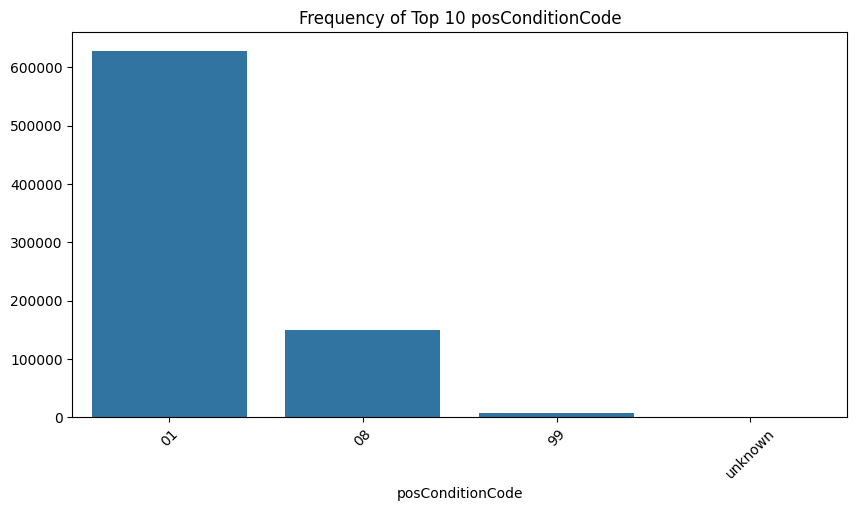

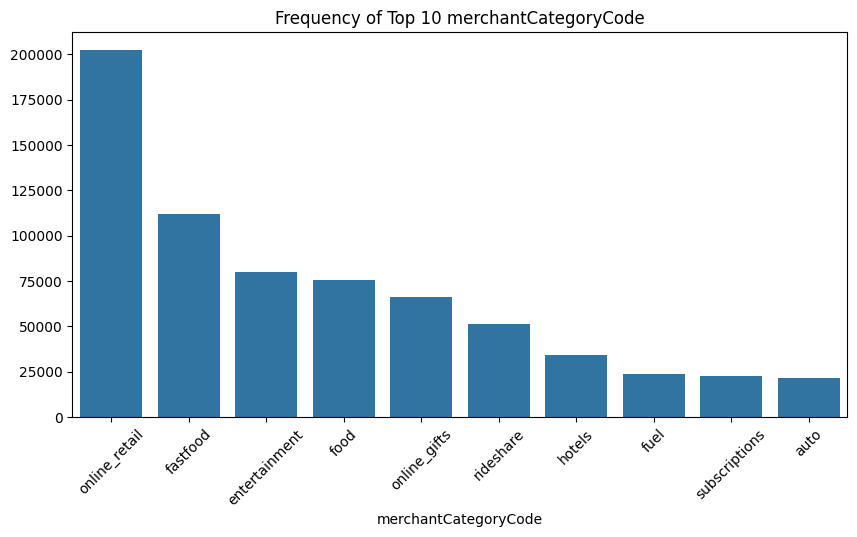

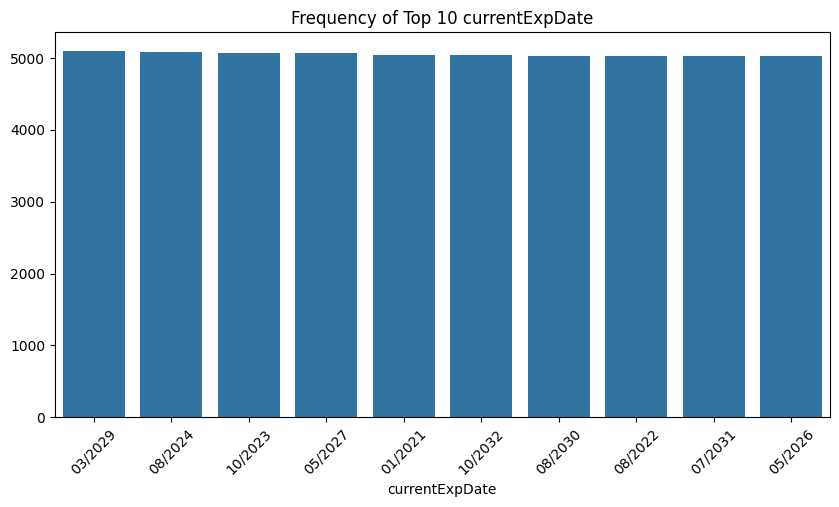

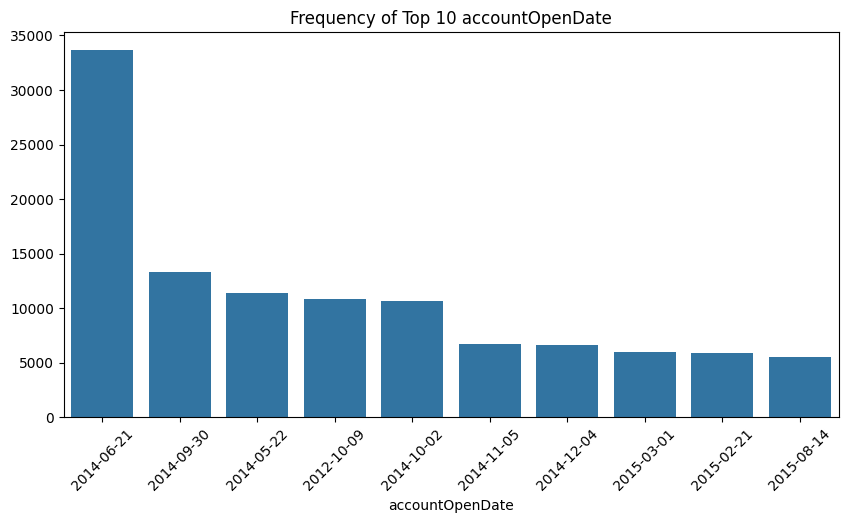

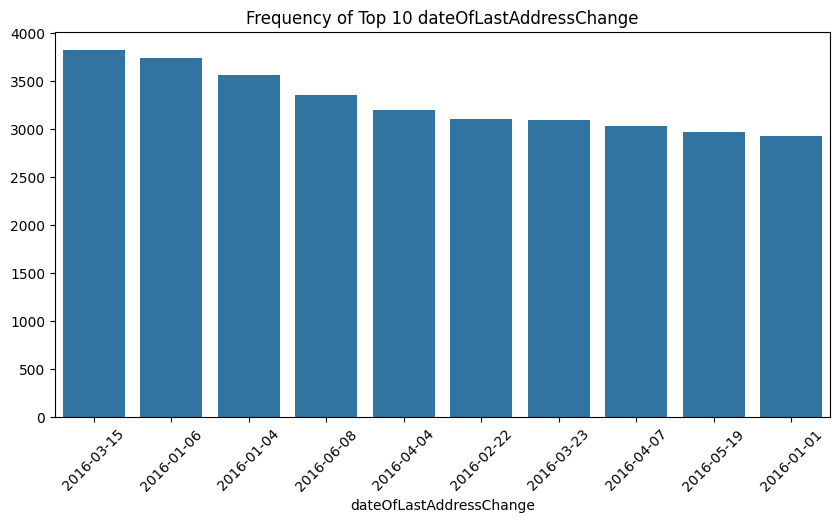

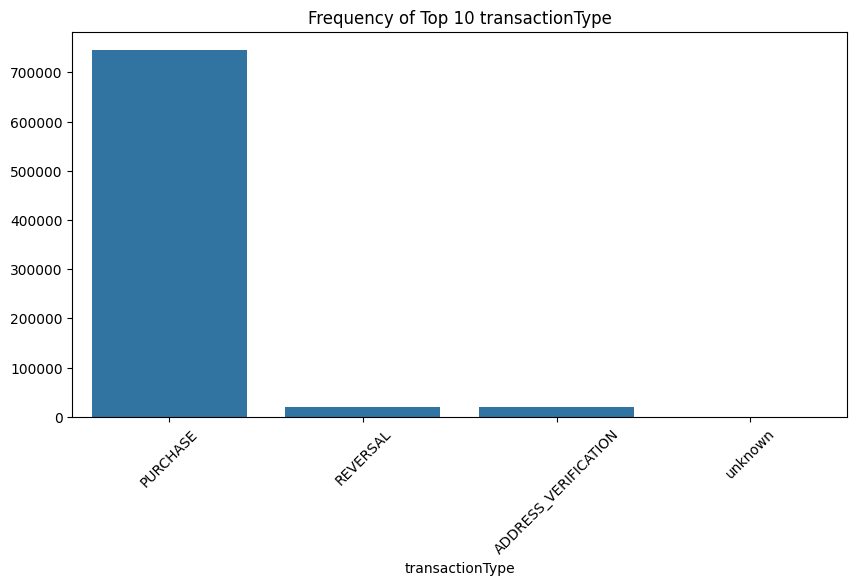

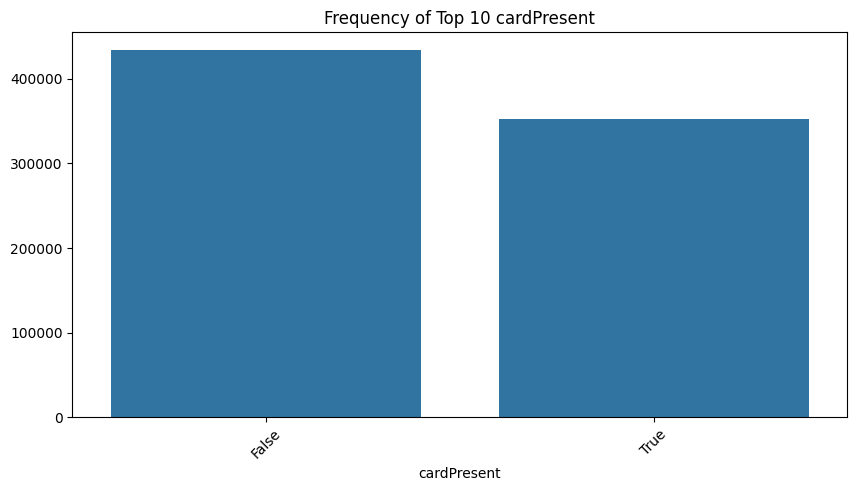

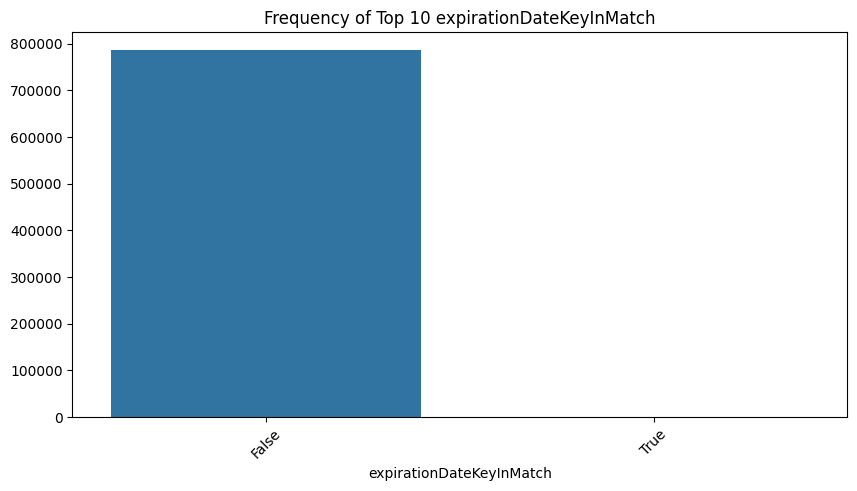

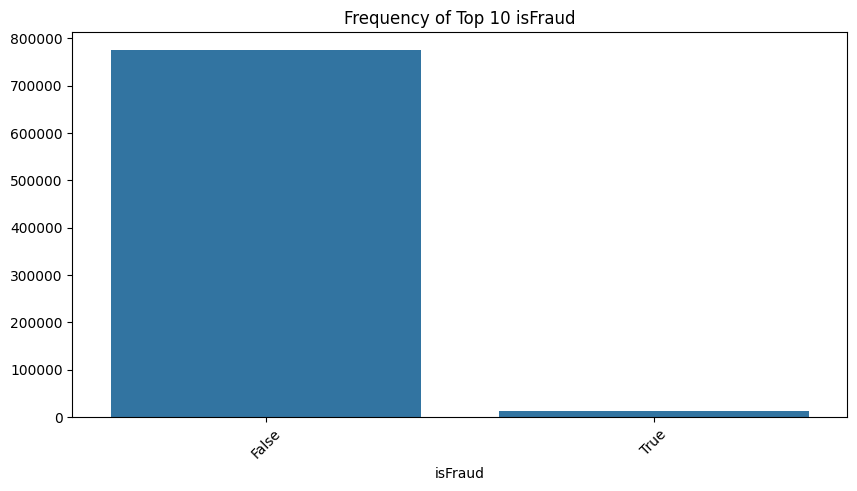

In [82]:
# 1. Histograms for Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print('numerical features')
print(numerical_features)
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
print('categorical_features')
print( categorical_features)

# 2. Bar Charts for Categorical Features
for col in categorical_features:
    counts = df[col].value_counts().nlargest(10)  # Taking the top 10 for brevity
    plt.figure(figsize=(10,5))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Frequency of Top 10 {col}')
    plt.xticks(rotation=45)
    plt.show()



## 5.2 Outlier Detection with boxplots

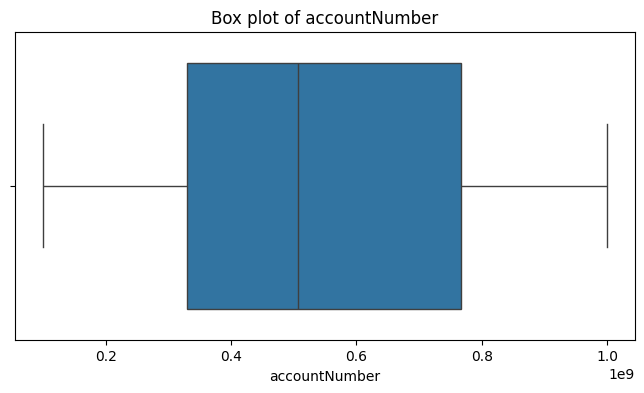

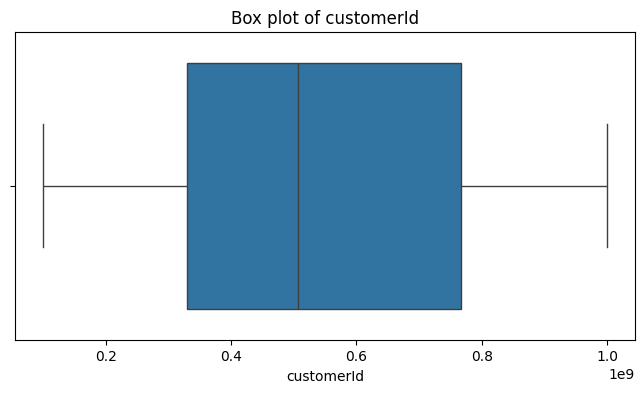

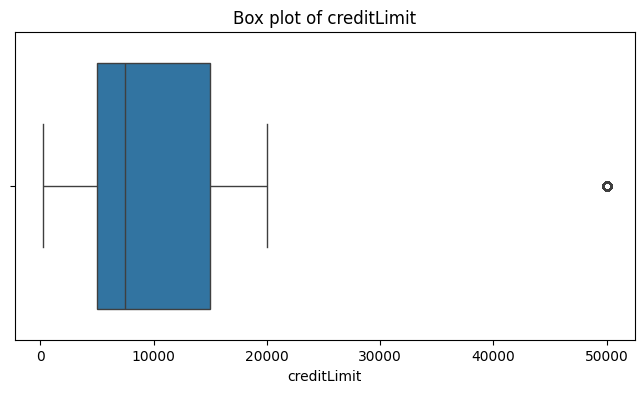

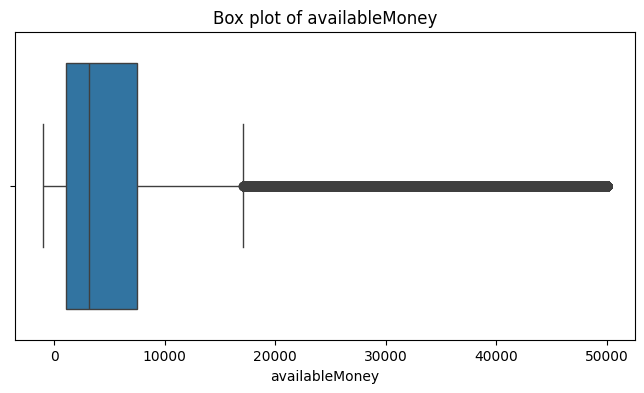

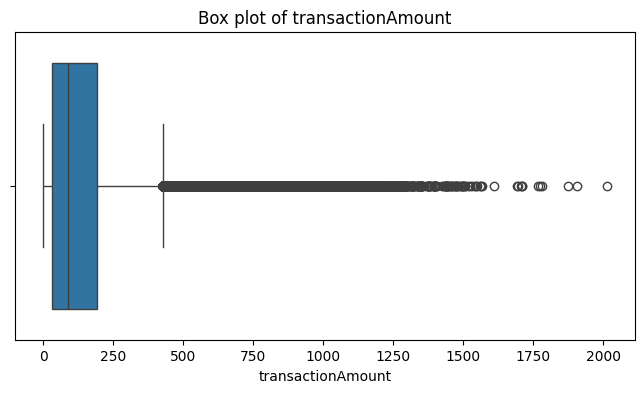

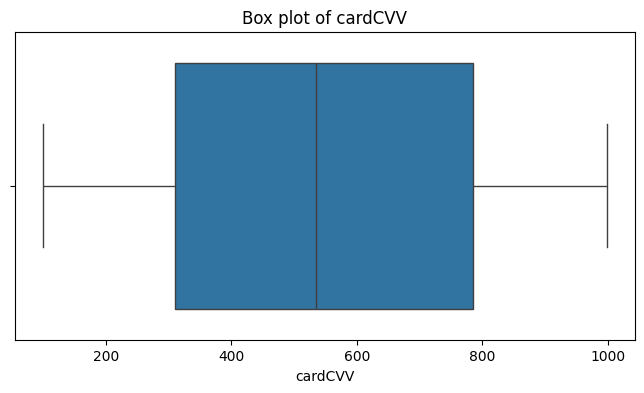

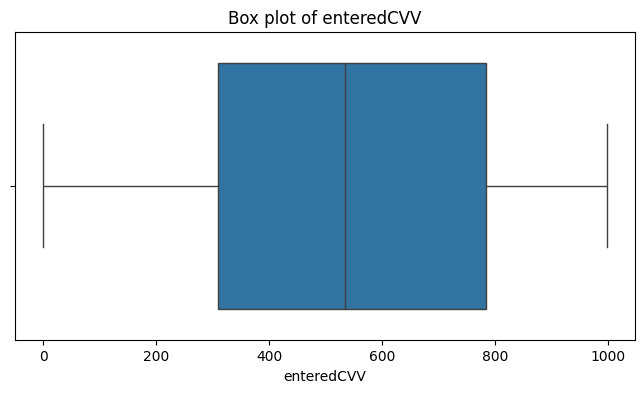

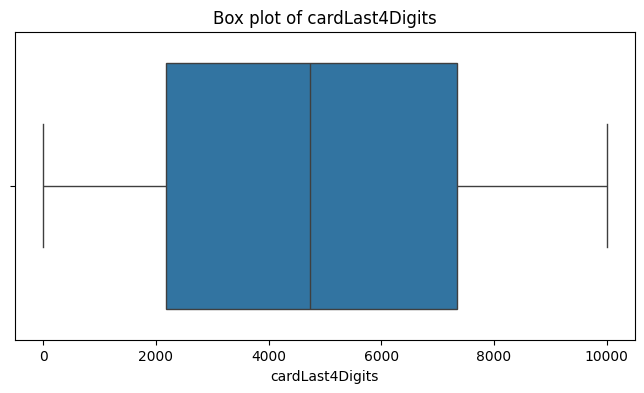

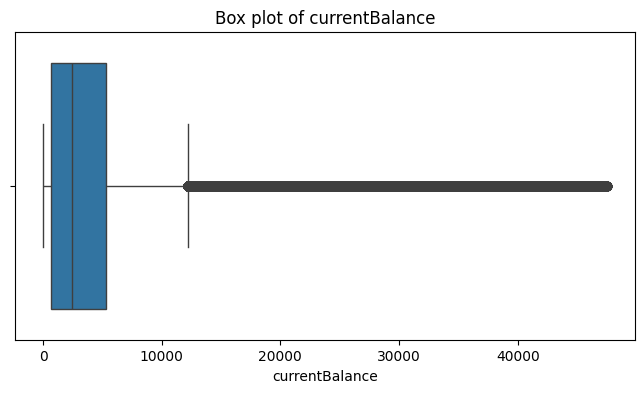

In [72]:
# 3. Box Plots for Numerical Features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()



## 5.3 Time Series Analysis

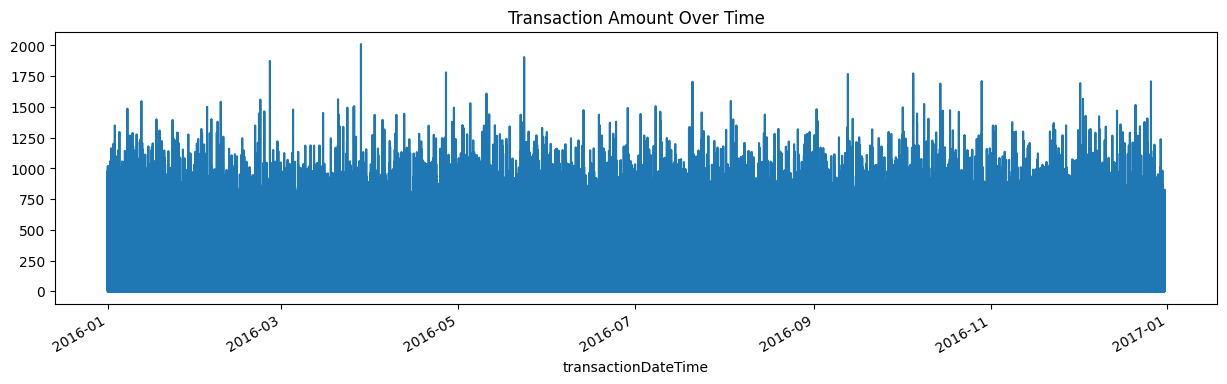

In [74]:
# 4. Time Series Plot
plt.figure(figsize=(15, 4))
df.set_index('transactionDateTime')['transactionAmount'].plot()
plt.title('Transaction Amount Over Time')
plt.show()



## 5.4 Correlation Analysis for Numerical Features


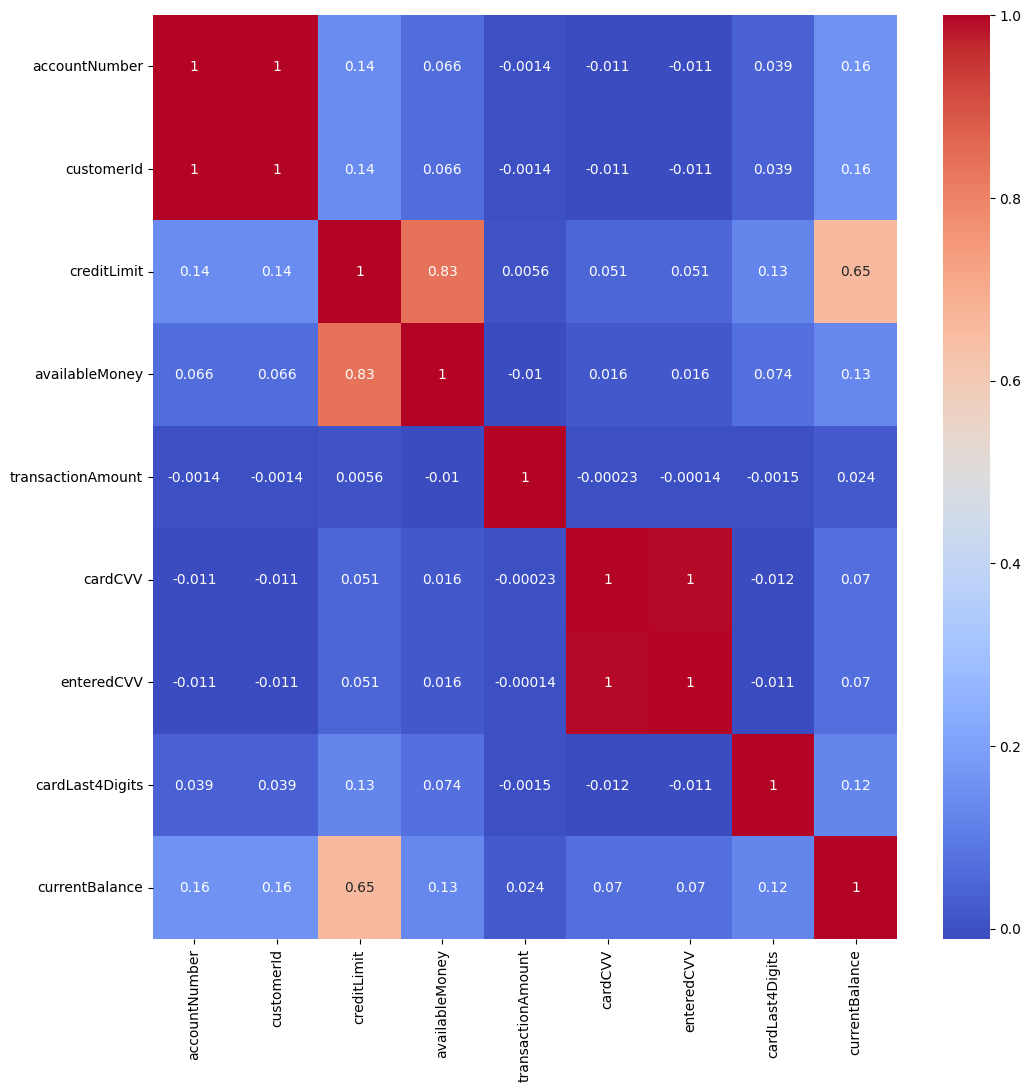

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()


# 6 Feature Encoding 

## 6.1 binary encoding for variable with only two value counts

In [84]:
binary_columns = []
categorical_columns = []

# Iterate over each column to determine if it's binary or categorical
for column in df.columns:
    # Exclude non-object (numerical) columns
    if df[column].dtype == 'object':
        unique_values = df[column].nunique()
        # If the column has exactly two unique values, consider it binary
        if unique_values == 2:
            binary_columns.append(column)
        elif unique_values > 2:  # More than two unique values -> categorical
            categorical_columns.append(column)

# Output the lists
print("Binary Columns:", binary_columns)
print("Categorical Columns:", categorical_columns)

Binary Columns: []
Categorical Columns: ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']


## 6.2 label encoding for variable with more than two value counts

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Apply one-hot encoding to binary columns
df = pd.get_dummies(df, columns=binary_columns)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each non-binary categorical column
for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))

# The DataFrame df is now encoded and ready for further processing

ModuleNotFoundError: No module named 'sklearn'